## Exploring Trends in Melbourne's Café and Restaurant Seating Capacity


z5286477

Chia-Yu, CHANG

In [36]:
import matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point


mel_prop = gpd.read_file(r'c:\Users\chiay\1161\cafes_data\property-boundaries/property-boundaries.shp')
mel_muni = gpd.read_file(r'c:\Users\chiay\1161\cafes_data\municipal-boundary/municipal-boundary.shp')



plt.rcParams['figure.figsize'] = (20, 10)

saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

filepath = r'c:\Users\chiay\1161\cafes_data\cafes-and-restaurants-with-seating-capacity.csv'

seats_data = pd.read_csv(filepath)

In [51]:
seats_data.sample(5)

,Census_year,Block_ID,Property_ID,Base_property_ID,Building_address,CLUE_small_area,Trading_name,Business_address,Industry_code,Industry_description,Seating_type,Number_seats,Longitude,Latitude,location
37697,2003,861,102504,102504,175-177 Domain Road SOUTH YARRA 3141,South Yarra,Bac's,175 Domain Road SOUTH YARRA 3141,4511,Cafes and Restaurants,Seats - Outdoor,8,144.981955,-37.834302,"-37.83430222852449, 144.9819551246561"
49808,2021,65,105698,105698,269-321 Lonsdale Street MELBOURNE VIC 3000,Melbourne (CBD),T Mix,"Shop 344, 287 Lonsdale Street MELBOURNE VIC 3000",4512,Takeaway Food Services,Seats - Indoor,26,144.963929,-37.812470,"-37.81247035035, 144.96392893701363"
24671,2021,720,108629,108629,427-431 St Kilda Road MELBOURNE VIC 3004,Melbourne (Remainder),Calla & Gardenia The Florist,"Suite 5, Ground 431 St Kilda Road MELBOURNE VI...",4274,Flower Retailing,Seats - Indoor,11,144.977055,-37.838529,"-37.83852859445, 144.97705516826431"
3741,2004,82,105370,105370,324-326 King Street MELBOURNE 3000,Melbourne (CBD),Cafe Sonnex,324-326 King Street MELBOURNE 3000,4511,Cafes and Restaurants,Seats - Outdoor,6,144.954284,-37.812617,"-37.81261664639733, 144.95428432683218"
35019,2022,85,105746,105746,Melbourne Central 183-265 La Trobe Street MELB...,Melbourne (CBD),Unabara/Gyoza Gyoza,"Shop 157, Level 1 300 Lonsdale Street MELBOURN...",4511,Cafes and Restaurants,Seats - Outdoor,44,144.962839,-37.810902,"-37.8109017475, 144.96283887063584"


## Restaurants on the map

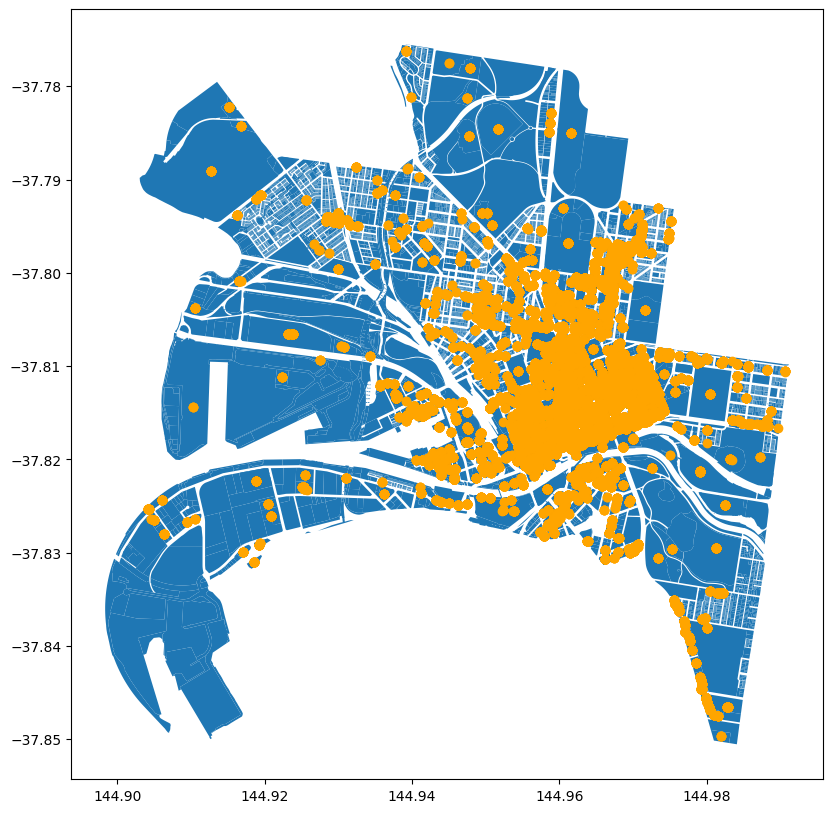

In [38]:
def plot_mel_sca(seats_data):
    mel_prop.plot()
    plt.scatter(seats_data['Longitude'], seats_data['Latitude'], c='orange', marker='o')
plot_mel_sca(seats_data)

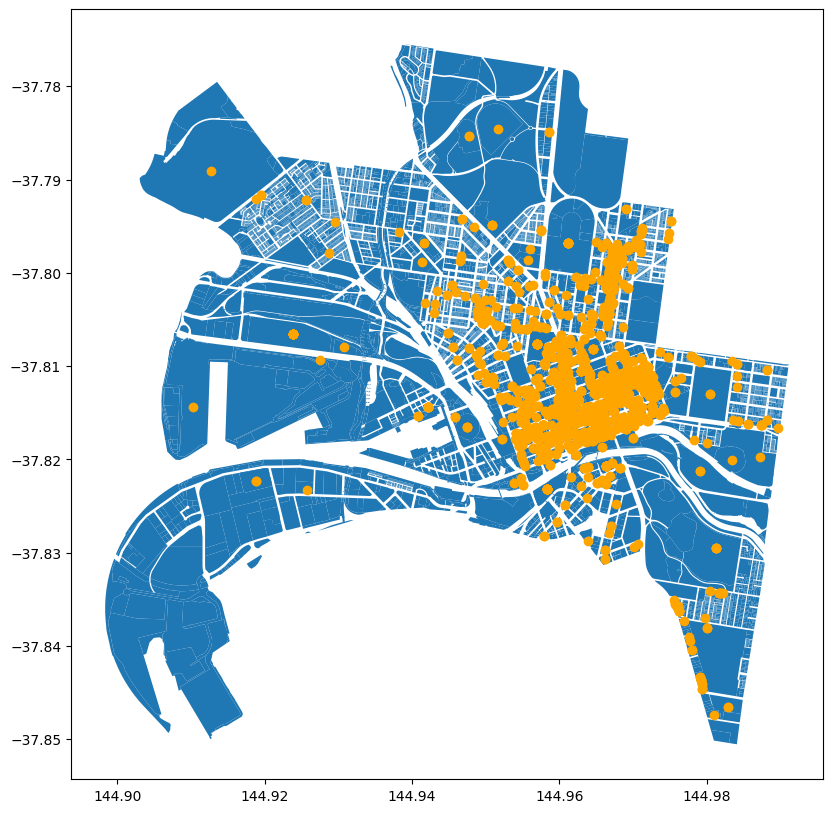

In [39]:
plot_mel_sca(seats_data[seats_data.Census_year == 2002])

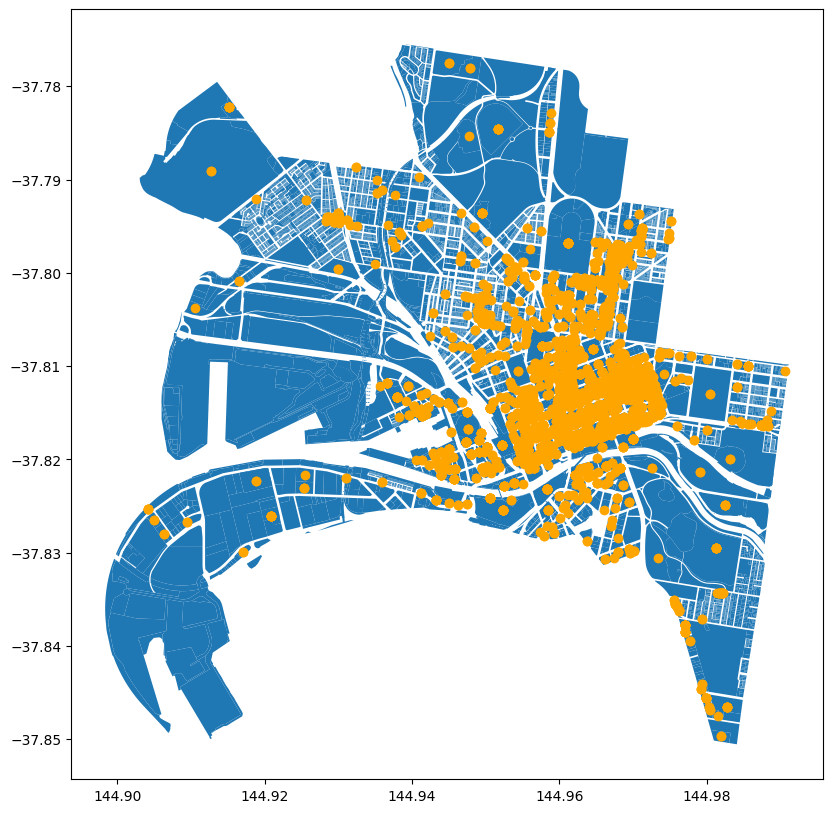

In [40]:
plot_mel_sca(seats_data[seats_data.Census_year == 2022])

## Compare in years

In [41]:
def plot_by_years():
    # Group the data by 'Census_year' and count the number of shops
    shops_by_year = seats_data.groupby('Census_year').size()

    # Sort the data by year
    shops_by_year = shops_by_year.sort_index()

    # Plot the line chart
    plt.figure(figsize=(14, 7))
    shops_by_year.plot(kind='line', color='darkred', marker='o')
    plt.xticks(ticks=range(2002, 2024, 2))
    plt.title('Number of Restaurants by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Restaurants')
    plt.grid(True)  # Add gridlines for better readability
    plt.show()

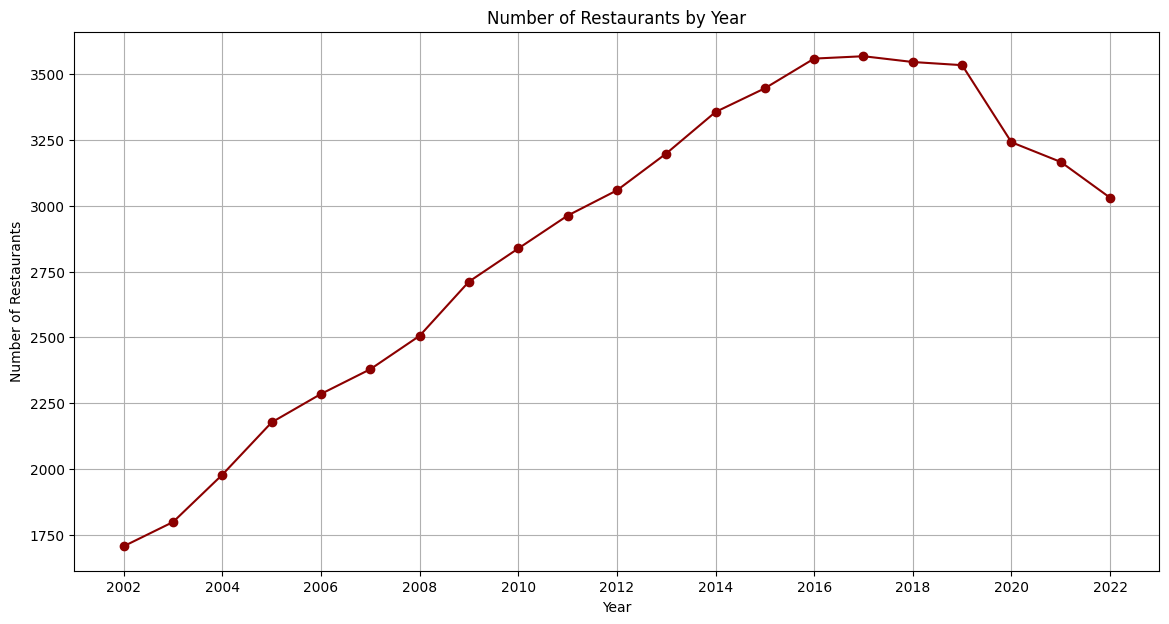

In [42]:
plot_by_years()

In [43]:
def plot_2017_to_2022():

    # Filter the data for the specified years
    filtered_data = seats_data[seats_data['Census_year'].isin([2017, 2018, 2019, 2020, 2021, 2022])].copy()

    # Define the bins for the ranges <100, 100-1000, >1000
    bins = [0, 100, float('inf')]
    labels = ['<100', '>100']

    # Create a new column for the seating range
    filtered_data['Seating_range'] = pd.cut(filtered_data['Number_seats'], bins=bins, labels=labels)

    # Group by Census_year and Seating_range, and count the number of shops
    shops_by_seating_range = filtered_data.groupby(['Census_year', 'Seating_range'], observed=False).size().unstack()

    # Plot the bar chart
    ax = shops_by_seating_range.plot(kind='bar', stacked=False, color=['skyblue', 'lightgreen', 'salmon'])

    # Add title and labels
    plt.title('Number of Restaurants by Seating Capacity Range and Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Restaurants')
    plt.xticks(rotation=360)

    # Show the plot
    plt.show()

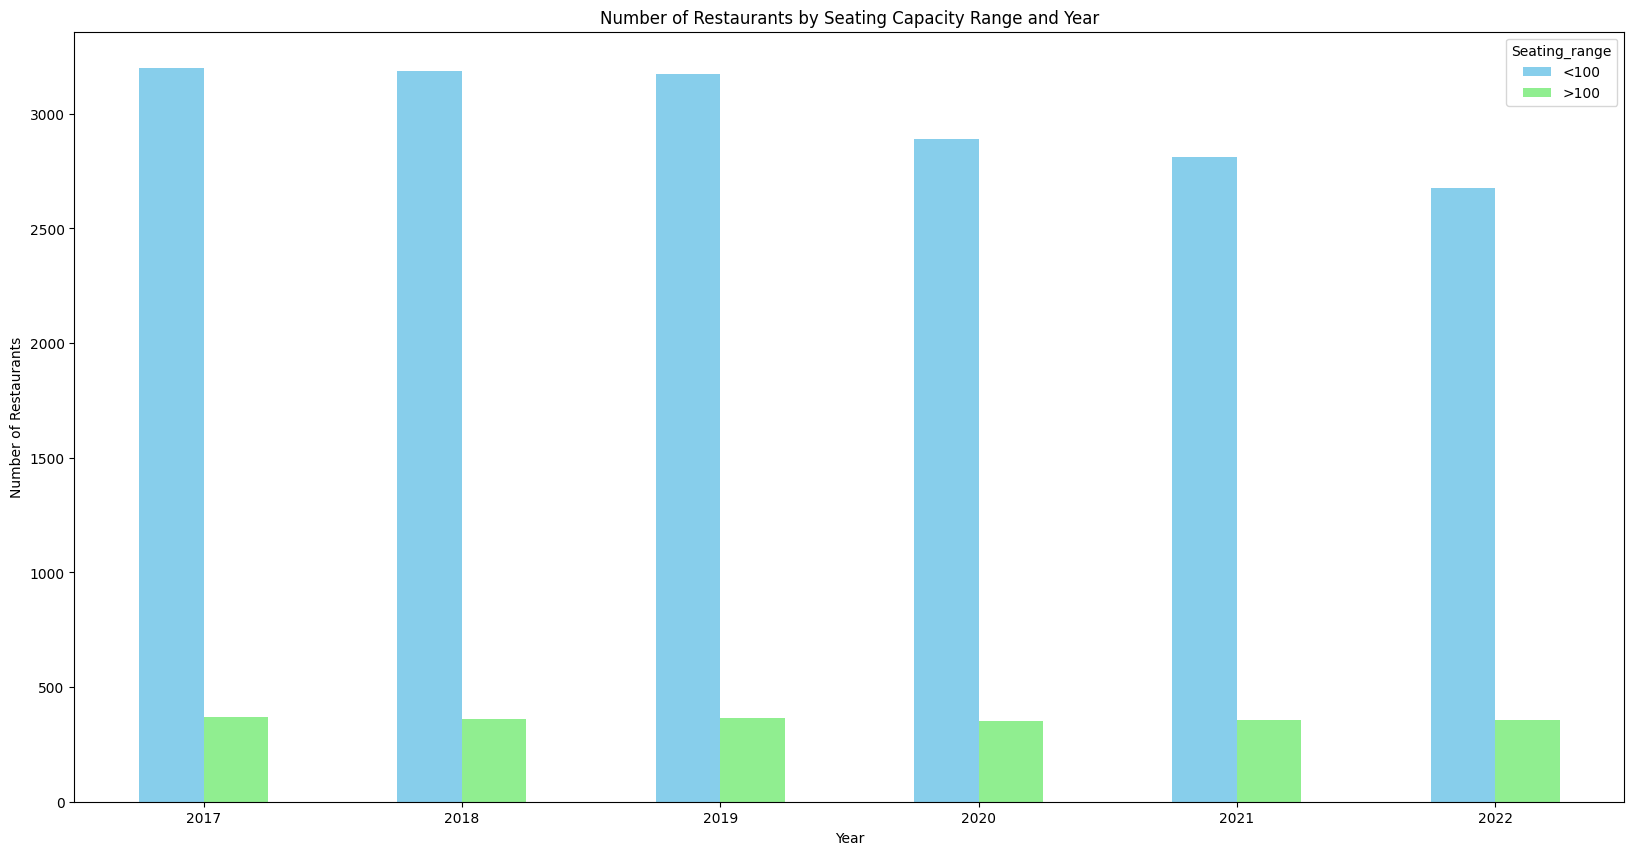

In [44]:
plot_2017_to_2022()

## Datas in 2022

In [45]:
seats_2022 = seats_data[seats_data.Census_year == 2022]

def pie_industry():
    # Group the data by Industry_description and count the number of occurrences
    industry_counts = seats_2022['Industry_description'].value_counts()

    # Calculate the total number of entries
    total_count = industry_counts.sum()

    # Filter out the categories that are less than 1% and sum them into 'Other'
    threshold = 0.01  # 1%
    small_counts = industry_counts[industry_counts / total_count < threshold]
    other_count = small_counts.sum()

    # Create a new Series without the small categories
    industry_counts_filtered = industry_counts[industry_counts / total_count >= threshold]

    # Add the 'Other' category
    industry_counts_filtered['Other'] = other_count

    # Plot the pie chart  
    plt.figure(figsize=(8.5, 8.5))
    plt.pie(industry_counts_filtered, labels=industry_counts_filtered.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

    # Add a title
    plt.title('Distribution of Industry Descriptions')

    # Display the plot
    plt.show()


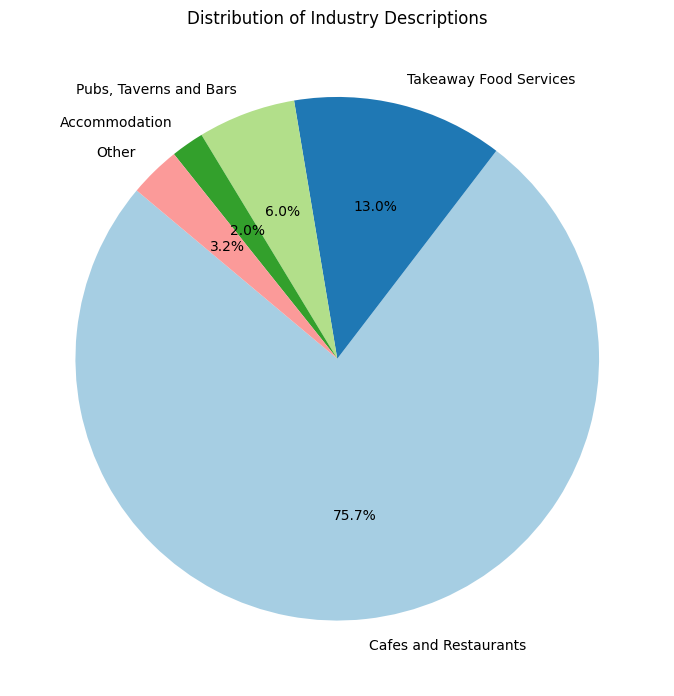

In [46]:
pie_industry()

In [47]:
trad_count = seats_2022.Trading_name.value_counts() 

def trading_name_compare():
    plt.figure(figsize=(12, 7))
    trad_count[trad_count > 5].plot(kind='barh', color='navy')
    plt.xticks(ticks=range(0,19, 2))
    plt.title('Restaurants Name in 2022')
    plt.ylabel('Restaurant Name')
    plt.xlabel('Number of Restaurants')
    plt.show()

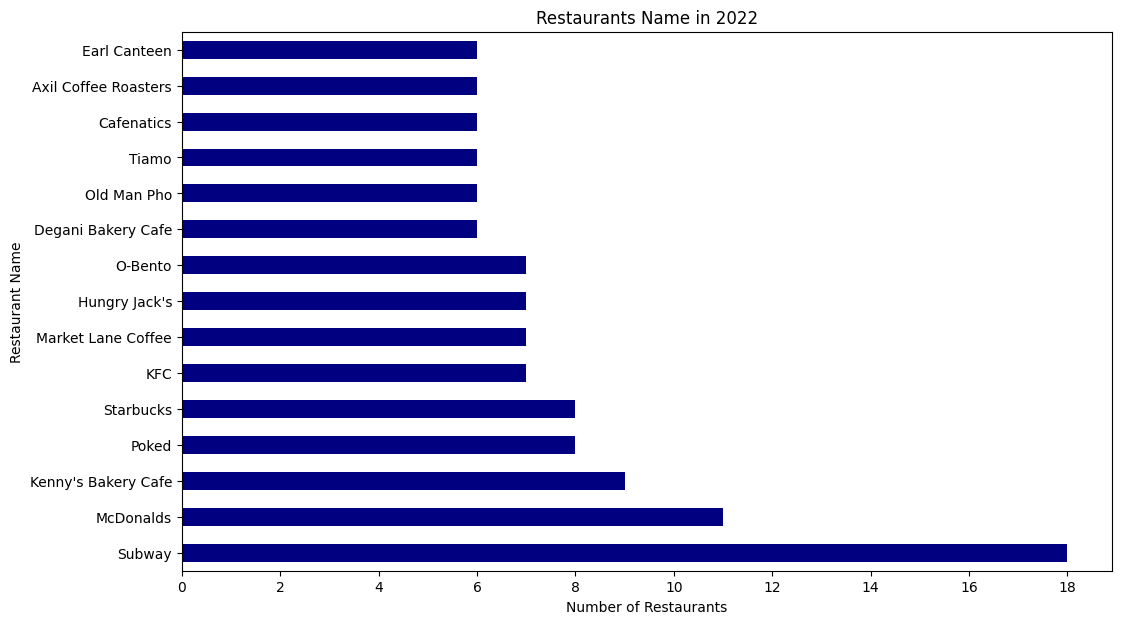

In [48]:
trading_name_compare()

In [49]:
def bar_seats_2022():
    s21 = seats_2022.Number_seats[seats_2022.Number_seats < 100]
    plt.figure(figsize=(14, 7))
    plt.hist(s21, bins=10, facecolor="skyblue", alpha=1)  # <-old one
    plt.hist(s21, bins=30, facecolor="salmon", alpha=1)  # <-new one
    plt.title('Number of seats <100 in 2022')
    plt.ylabel('Number of Restaurant ')
    plt.xlabel('Number of Seats')
    plt.show()

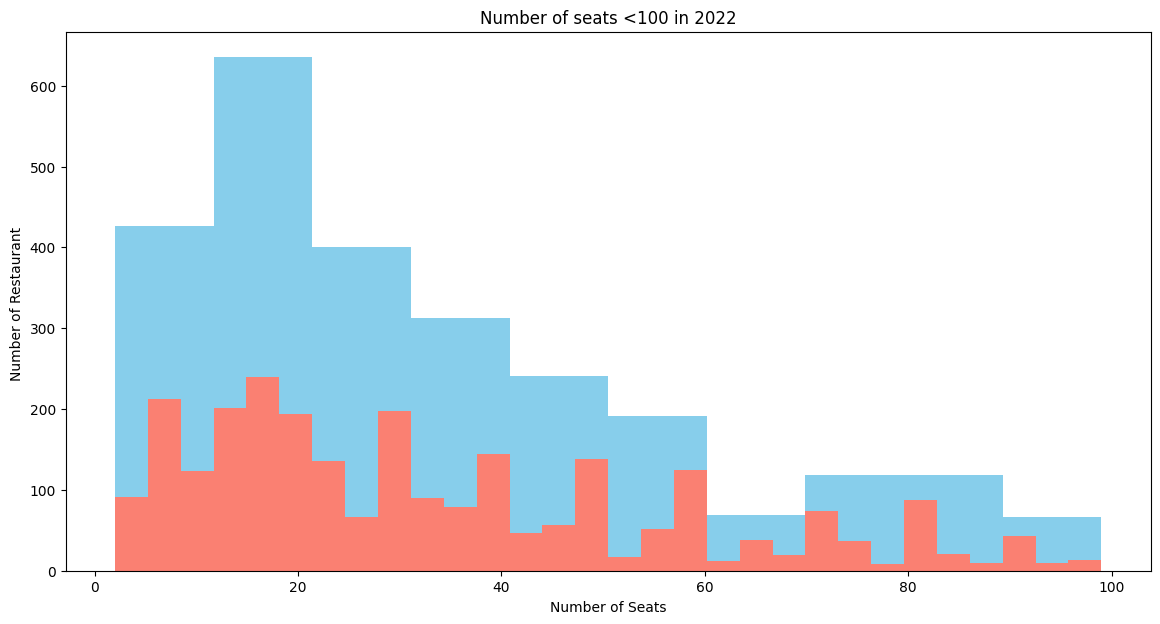

In [50]:
bar_seats_2022()

## Thank you for listening